# Bilateral Filter

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@4639dd1c

This `Op` is designed to smooth out slightly noisy images while still preserving sharp edges, unlike most other smoothing filters. Let's take a look at how this `Op` is called:

In [7]:
ij.op().help('bilateral')

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.bilateral.DefaultBilateral(
		RandomAccessibleInterval out,
		RandomAccessibleInterval in,
		double sigmaR,
		double sigmaS,
		int radius)

Here we have an image of a Kingfisher ([Source](https://commons.wikimedia.org/wiki/Coraciiformes#/media/File:Green-backed_Kingfisher_%28Male%29_cropped.jpg))

[INFO] Populating metadata


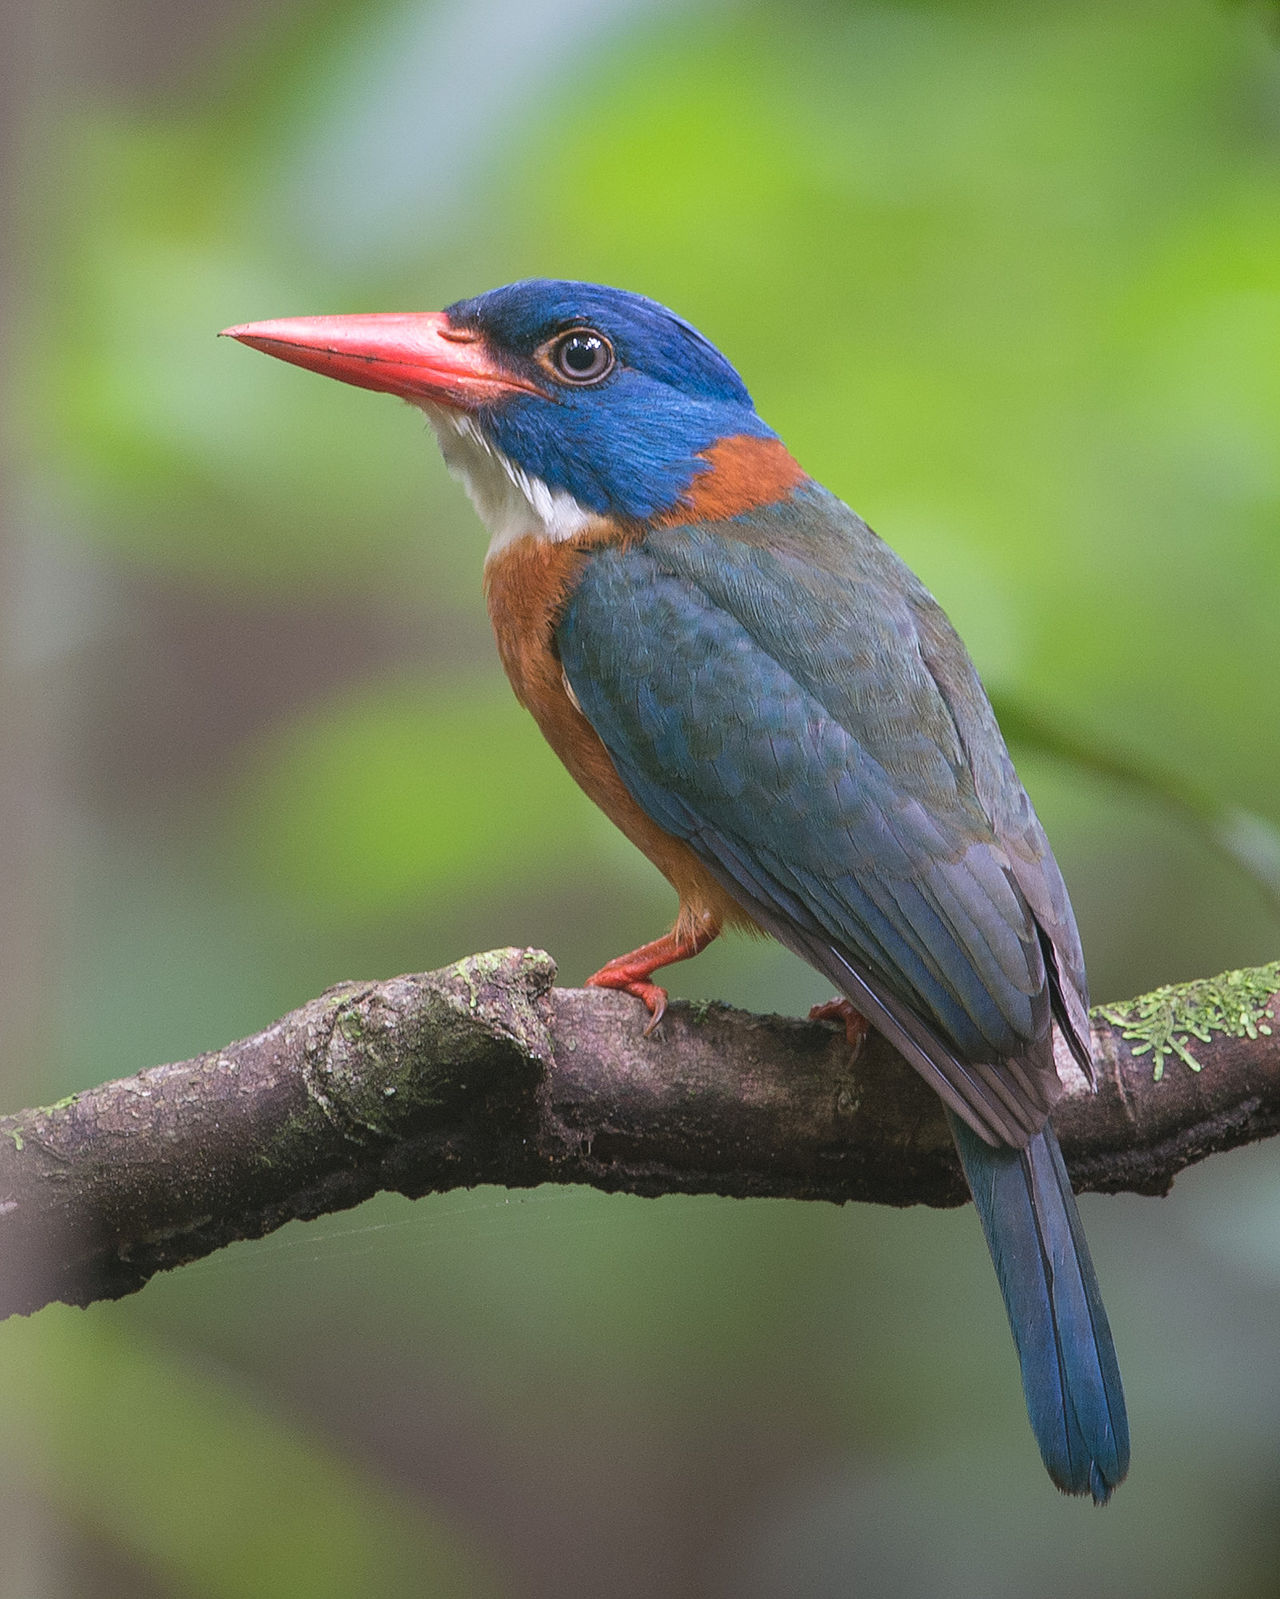

In [4]:
input = ij.scifio().datasetIO().open("https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Green-backed_Kingfisher_%28Male%29_cropped.jpg/1280px-Green-backed_Kingfisher_%28Male%29_cropped.jpg")
ij.notebook().display(input)

We will only run the head of the Kingfisher through the algorithm to save time.

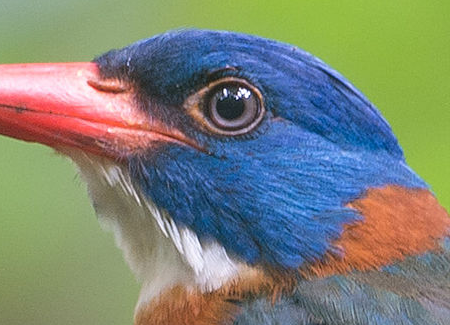

In [5]:
import net.imglib2.interpolation.randomaccess.NearestNeighborInterpolatorFactory
import net.imglib2.FinalInterval

region = FinalInterval.createMinSize(350, 250, 0, 450, 325, 3)
cropped = ij.op().run("crop", input, region)
ij.notebook().display(cropped)

Let's run this image through the filter now. This particular filter can take upwards of 10 seconds to run on this image with these settings due to the intensive nature of the algorithm.

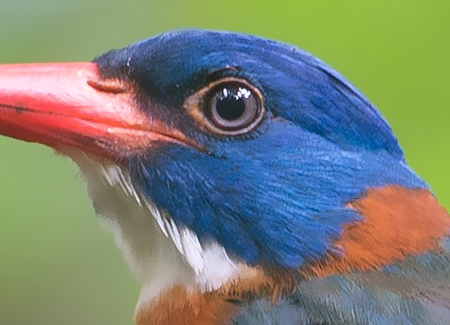

In [6]:
import net.imglib2.type.numeric.real.DoubleType

//refers to the range smoothing parameter; the greater the sigma, 
//the closer the effects of the filter to that of a Gaussian.
sigmaR = 10

//refers to the spatial smoothing parameter; the greater the sigma, the
//smoother the features of the image.
sigmaS = 10

//refers to the radius of the square of data points that are considered 
//when doing the filter on each individual picture.
radius = 7

actualOutput = ij.op().create().img(cropped, new DoubleType())
ij.op().filter().bilateral(actualOutput, cropped, sigmaR, sigmaS, radius)
ij.notebook().display(actualOutput)

While the edges of the Kingfisher and the branch remain sharp there is visible blurring on the feathers (especially on the orange and gray regions).